Get insights from Lending club data

Description: The data represents unsecured loans made to individuals through a third-party platform that brings together
borrowers and lenders.The end goal of the data analysis is to eventually come up with a predictive model that can predict
which loan applications should be approved and which are likely to default. In order to get started on the analysis,
we first want to do some basic exploratory data analysis to assess what is in the data and figure out some basic insights.

In [1]:
import pandas as pd
import numpy as np

In [2]:
loan=pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,issue_d,loan_status,term
0,54734,80364,25000,25000,19419.94,11.89%,829.10,B,B4,True,26-07-2009,05-08-2009,Fully Paid,36months
1,55742,114426,7000,7000,6549.40,10.71%,228.22,B,B5,False,12-05-2008,27-05-2008,Fully Paid,36months
2,57245,138150,1200,1200,1200.00,13.11%,40.50,C,C2,False,11-03-2010,22-03-2010,Fully Paid,36months
3,57416,139635,10800,10800,10637.65,13.57%,366.86,C,C3,False,04-11-2009,12-11-2009,Fully Paid,36months
4,58524,149512,7200,7200,1800.00,19.05%,264.11,D,D4,False,14-08-2012,21-08-2012,Current,36months


In [3]:
loan.shape[0]

13102

In [4]:
loan['term'].unique()

array(['36months', '60months'], dtype=object)

In [5]:
loan['term'].value_counts()/loan.shape[0]

36months    0.902534
60months    0.097466
Name: term, dtype: float64

In [6]:
#WHat is the average interest rate paid by tenure?
loan['int_rate'].head()

0    11.89%
1    10.71%
2    13.11%
3    13.57%
4    19.05%
Name: int_rate, dtype: object

In [7]:
loan['int_rate']=loan['int_rate'].str.replace("%","").astype('float')

In [8]:
loan['int_rate'].head()

0    11.89
1    10.71
2    13.11
3    13.57
4    19.05
Name: int_rate, dtype: float64

In [9]:
loan.groupby('term')['int_rate'].mean()

term
36months    11.720473
60months    13.947525
Name: int_rate, dtype: float64

In [10]:
#Understand loan status
loan['loan_status'].nunique()

7

In [11]:
loan['loan_status'].value_counts()/loan.shape[0]

Fully Paid            0.719356
Current               0.153183
Charged Off           0.115784
Late (31-120 days)    0.007251
In Grace Period       0.003206
Late (16-30 days)     0.000763
Default               0.000458
Name: loan_status, dtype: float64

In [12]:
demo=pd.read_csv('Demo.csv')
demo.head()

,id,emp_name,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_city,addr_state
0,446026,Severstal North America,10+ years,OWN,122000.0,,debt_consolidation,Good credit here,SILVER SPRING,MD
1,449093,NaN,< 1 year,RENT,32400.0,,debt_consolidation,life consolidation,ARTESIA,CA
2,449172,Pyramid Services Inc,9 years,RENT,42140.0,,debt_consolidation,Looking to get ahead,LANCASTER,CA
3,449668,desert valley medical group,5 years,RENT,27840.0,,debt_consolidation,debt consolidation,NORTH LAS VEGAS,NV
4,450747,"Baptist International Missions, Inc.",10+ years,OWN,25800.0,,home_improvement,home improvements,LEWISVILLE,TX


In [13]:
demo.shape

(13102, 10)

In [14]:
loan.shape

(13102, 14)

In [15]:
demo.columns

Index(['id', 'emp_name', 'emp_length', 'home_ownership', 'annual_inc', 'desc',
       'purpose', 'title', 'addr_city', 'addr_state'],
      dtype='object')

In [16]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term'],
      dtype='object')

In [17]:
#Merges
#left join : Retain all the records in x
#Right join
#inner join
#Outer join

In [18]:
A=pd.DataFrame({'X1':['a','b','c'],'X2':[1,2,3]})
B=pd.DataFrame({'X1':['a','b','d','e'],'X3':[True,False,True,True]})

In [19]:
A

,X1,X2
0,a,1
1,b,2
2,c,3


In [20]:
B

,X1,X3
0,a,True
1,b,False
2,d,True
3,e,True


In [21]:
#Left join: Retain all records in the data fram in left side
pd.merge(A,B,on='X1',how='left')

,X1,X2,X3
0,a,1,True
1,b,2,False
2,c,3,NaN


In [22]:
B

,X1,X3
0,a,True
1,b,False
2,d,True
3,e,True


In [23]:
#Right join: Retain all records in the data frame in right side
pd.merge(A,B,on='X1',how='right')

,X1,X2,X3
0,a,1.0,True
1,b,2.0,False
2,d,NaN,True
3,e,NaN,True


In [24]:
#Inner join: Retain all the common records
pd.merge(A,B,on='X1',how='inner')

,X1,X2,X3
0,a,1,True
1,b,2,False


In [25]:
#OUter join: Join all the records.
pd.merge(A,B,how='outer')

,X1,X2,X3
0,a,1.0,True
1,b,2.0,False
2,c,3.0,NaN
3,d,NaN,True
4,e,NaN,True


In [26]:
#What type of merge I can use to join loan.csv and demo.csv?
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term'],
      dtype='object')

In [27]:
demo.columns

Index(['id', 'emp_name', 'emp_length', 'home_ownership', 'annual_inc', 'desc',
       'purpose', 'title', 'addr_city', 'addr_state'],
      dtype='object')

In [28]:
#Merge loan and demo
lc=pd.merge(loan,demo,on='id',how='outer')
lc.shape

(13102, 23)

In [29]:
lc['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'small_business', 'major_purchase', 'moving', 'other', 'house',
       'vacation', 'educational', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

In [30]:
lc['purpose'].value_counts()/lc.shape[0]

debt_consolidation    0.430240
other                 0.132117
credit_card           0.130133
home_improvement      0.068463
major_purchase        0.060830
small_business        0.050221
car                   0.030224
wedding               0.024805
educational           0.023966
medical               0.015799
moving                0.014273
house                 0.010075
vacation              0.007022
renewable_energy      0.001832
Name: purpose, dtype: float64

In [31]:
#How interest rate varies by purpose of the loan?
lc.groupby('purpose')['int_rate'].mean().sort_values(ascending=False)

purpose
small_business        13.212112
debt_consolidation    12.379383
house                 11.918939
wedding               11.802585
medical               11.711691
credit_card           11.645367
educational           11.601656
other                 11.593795
moving                11.372193
renewable_energy      11.313750
home_improvement      11.300045
major_purchase        10.960903
vacation              10.948804
car                   10.735960
Name: int_rate, dtype: float64

In [32]:
lc.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term', 'emp_name', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'title', 'addr_city',
       'addr_state'],
      dtype='object')

In [33]:
#Average grant rate ?
lc['grant']=lc['funded_amnt']/lc['loan_amnt']

In [34]:
lc['grant'].mean()

0.9846802208207756

In [35]:
lc['grant'].describe()

count    13102.000000
mean         0.984680
std          0.076141
min          0.154688
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: grant, dtype: float64

In [36]:
#Average loan amount and funded amount by term.
lc.groupby('term')[['loan_amnt','funded_amnt']].mean().reset_index()

,term,loan_amnt,funded_amnt
0,36months,9856.896406,9716.236786
1,60months,12421.006265,11249.412686


In [37]:
#How the interest rate differ by grades and how many customers fall in each grade? mean and count
lc.groupby('grade').agg({'int_rate':np.mean,'grade':np.size})

,int_rate,grade
grade,,
A,8.053571,2985
B,11.156371,4048
C,13.169573,3183
D,14.914989,1896
E,16.601717,722
F,18.292297,209
G,20.297966,59


In [38]:
lc.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term', 'emp_name', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'title', 'addr_city',
       'addr_state', 'grant'],
      dtype='object')

In [39]:
lc['annual_inc'].describe()

count    1.310200e+04
mean     6.839151e+04
std      9.164065e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.600000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [40]:
lc['annual_inc'].min()

4000.0

In [41]:
lc['annual_inc'].max()

6000000.0

In [42]:
lc['annual_inc'].mean()

68391.50963974965

In [43]:
lc['annual_inc'].median()

56000.0

In [44]:
#How to define a function?: lambda
def income_bin(x):
    if x<=30000:
        return 'Group1'
    elif 30000<x<=60000:
        return 'Group2'
    elif 60000<x<=100000:
        return 'Group3'
    else:
        return 'Group4'

In [45]:
lc['inc_bin']=lc['annual_inc'].map(income_bin)

In [46]:
lc['inc_bin'].value_counts()

Group2    5691
Group3    3939
Group4    1762
Group1    1710
Name: inc_bin, dtype: int64

In [47]:
#Finding average grant rate by income level?
lc.groupby('inc_bin')['grant'].mean()

inc_bin
Group1    0.993842
Group2    0.986411
Group3    0.980674
Group4    0.979155
Name: grant, dtype: float64

In [48]:
lc.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term', 'emp_name', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'title', 'addr_city',
       'addr_state', 'grant', 'inc_bin'],
      dtype='object')

In [49]:
def flag(df):
    if df['grade']=='A' and df['term']=='60months':
        return 1
    else:
        return 0

In [50]:
lc['flag']=lc.apply(flag,axis=1)

In [51]:
lc['flag'].sum()

95

In [52]:
#How many customers are there in Grade A and are in 60 month loan term?
lc.query("grade=='A' and term=='60months'").shape[0]

95

In [53]:
lc[['accept_d','issue_d']].head()

,accept_d,issue_d
0,26-07-2009,05-08-2009
1,12-05-2008,27-05-2008
2,11-03-2010,22-03-2010
3,04-11-2009,12-11-2009
4,14-08-2012,21-08-2012


In [54]:
lc[['accept_d','issue_d']].dtypes

accept_d    object
issue_d     object
dtype: object

In [55]:
# 11-03-2010 ---> %d-%m-%Y
# 12-April-11 --> %d-%B-%y
# Apr-2015 --> %b-%Y

In [56]:
lc['accept_d']=pd.to_datetime(lc['accept_d'],format="%d-%m-%Y")
lc['accept_d'].head()

0   2009-07-26
1   2008-05-12
2   2010-03-11
3   2009-11-04
4   2012-08-14
Name: accept_d, dtype: datetime64[ns]

In [57]:
lc['issue_d']=pd.to_datetime(lc['issue_d'],format="%d-%m-%Y")
lc['issue_d'].head()

0   2009-08-05
1   2008-05-27
2   2010-03-22
3   2009-11-12
4   2012-08-21
Name: issue_d, dtype: datetime64[ns]

In [58]:
lc['accept_d'].dt.month[0]

7

In [59]:
lc['accept_d'].dt.day[0]

26

In [60]:
lc['accept_d'].dt.year[0]

2009

In [61]:
lc['days']=lc['issue_d']-lc['accept_d']
lc['days'].head()

0   10 days
1   15 days
2   11 days
3    8 days
4    7 days
Name: days, dtype: timedelta64[ns]

In [62]:
#How many applications was processing after 15 days?
#lc['days'].to_string()

In [63]:
str(lc['days'].loc[0,]).split()[0]

'10'

In [64]:
d=[]
for i in lc['days']:
    d.append(str(i).split()[0])

In [65]:
lc['days']=d
lc['days'].head()

0    10
1    15
2    11
3     8
4     7
Name: days, dtype: object

In [66]:
lc['days']=lc['days'].astype('int')
lc['days'].head()

0    10
1    15
2    11
3     8
4     7
Name: days, dtype: int32

In [67]:
lc[lc['days']>15].shape[0]

750

In [68]:
import matplotlib.pyplot as plt
import seaborn as sn

(array([ 505., 2077., 1350., 2925., 2679., 1876., 1181.,  350.,  116.,
          43.]),
 array([ 5.79 ,  7.375,  8.96 , 10.545, 12.13 , 13.715, 15.3  , 16.885,
        18.47 , 20.055, 21.64 ]),
 <BarContainer object of 10 artists>)

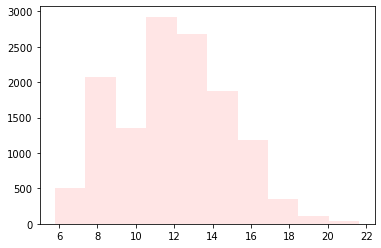

In [71]:
plt.hist(loan.int_rate, bins=10, color="red", alpha=0.1)

In [72]:
from matplotlib import style

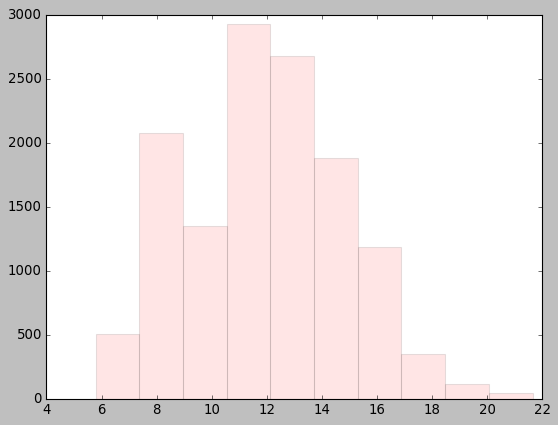

In [74]:
style.use("classic")
plt.hist(loan.int_rate, bins=10, color='red', alpha=0.1)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

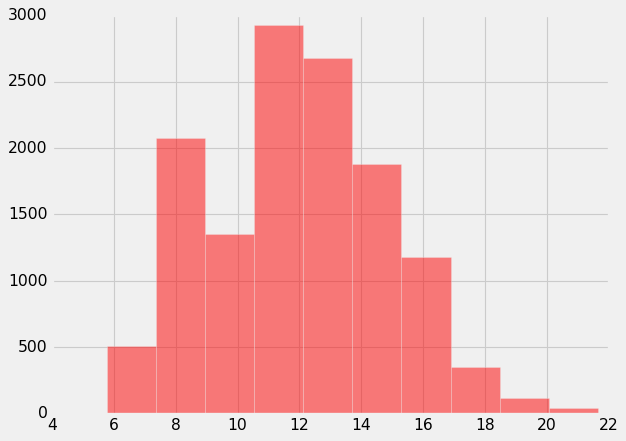

In [76]:
style.use("fivethirtyeight")
plt.hist(loan.int_rate, bins=10, color='red', alpha=0.5)
plt.show